Sophie van Dijke (s3567826)
Assignment 1

In [1]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

Set up noise, time_to_pulses, and pulses_to_time

In [2]:
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1-rand)/rand)

In [4]:
def time_to_pulses(time, t_0=0.011, a =1.1, b = 0.015):
    pulses = 0
    pulse_duration = t_0
    while time >=0: # pulse duration
        time -=pulse_duration
        pulses+=1
        pulse_duration = a * pulse_duration + noise(b * a * pulse_duration)
    return pulses

In [5]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015):
    time = 0
    pulse_duration = t_0
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses -1
        pulse_duration = a * pulse_duration + noise(b * a * pulse_duration)
    return time

The simulation below is a function which takes an input of number of subjects, the initial response stimuli interval, and the second response stimuli interval. Then the function loops through the trials for each subject and makes some checks and updates some variables. Firstly, it checks if it is the 16th trial because that is when the time interval is changed to the second one. Then the model updates the predicted pulses which then updates the subject's predicted time interval for trial. Then this predicted time is added to sum which contributes to the average of predicted pulses.

In [6]:
def sim(n_subjects, t_initial, t_2, n_trials=16):
    # Create a list to store 'RT'
    results = []

    for i in range(n_subjects):
        expect_pulses = 0
        est_time = t_initial
        t_trial = t_initial
        
        for trial in range(1, n_trials + 1):
            #On the 16th trial, change the RSI
            if trial == 16:
                t_trial = t_2
            expect_pulses += time_to_pulses(est_time/trial)
            predict_time = pulses_to_time(expect_pulses/trial)
            est_time += predict_time
            if predict_time < t_trial:
                #Check if difference between stimulus onset and expectation is at least 50 ms
                if (t_trial - predict_time) > 0.05:
                    RT = 0.41 - 0.05
                else:
                    preparation = t_trial - predict_time
                    RT = 0.41 - preparation
            else:
                RT = 0.41
            # Append 'RT' to the list
            results.append({'RT': RT, 'Trial': trial})
    # Convert the list to a DataFrame
    results = pd.DataFrame(results)
    return results

# Example usage
r10 = sim(10, 700, 467)

PLot for the first condition where the response stimulus interval does not change.

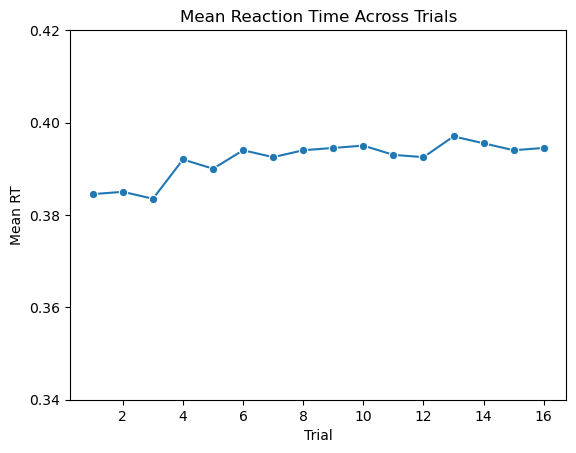

In [7]:
results_1 = sim(100, 467, 467)

# Calculate the mean RT for each trial
mean_rt_by_trial = results_1.groupby('Trial')['RT'].mean().reset_index()

# Plot the results
sns.lineplot(x='Trial', y='RT', data=mean_rt_by_trial, marker='o')
plt.xlabel('Trial')
plt.ylabel('Mean RT')
plt.title('Mean Reaction Time Across Trials')
plt.ylim(0.34, 0.42)
plt.yticks(np.arange(0.34, 0.43, 0.02))
plt.show()

Plot for the second condition where the response stimulus interval increases from 350 ms to 467 ms on the 16th trial

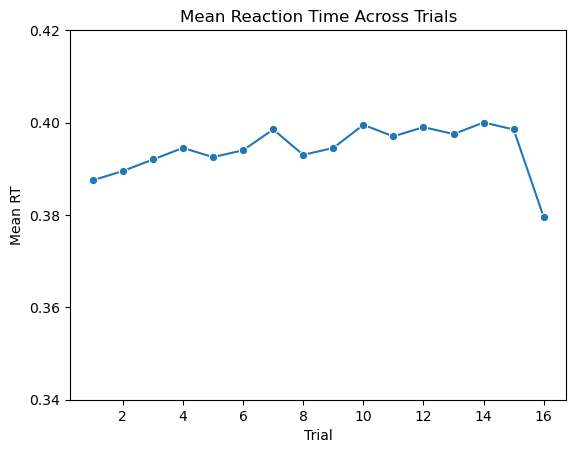

In [8]:
results_2 = sim(100, 350, 467)

# Calculate the mean RT for each trial
mean_rt_by_trial = results_2.groupby('Trial')['RT'].mean().reset_index()

# Plot the results
sns.lineplot(x='Trial', y='RT', data=mean_rt_by_trial, marker='o')
plt.xlabel('Trial')
plt.ylabel('Mean RT')
plt.title('Mean Reaction Time Across Trials')
plt.ylim(0.34, 0.42)
plt.yticks(np.arange(0.34, 0.43, 0.02))
plt.show()

Plot for the second condition where the response stimulus interval decreases from 700 ms to 467 ms on the 16th trial

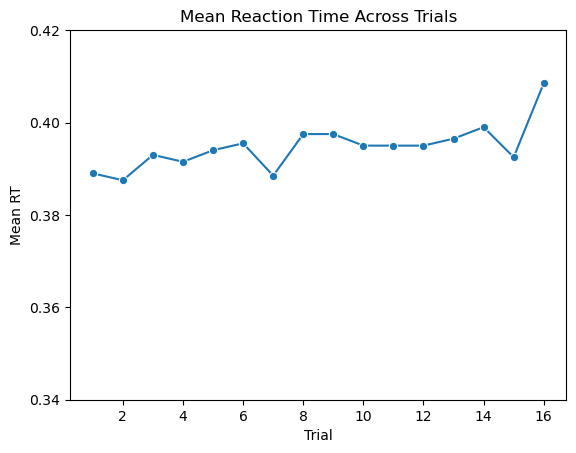

In [9]:
results_3 = sim(100, 700, 467)

# Calculate the mean RT for each trial
mean_rt_by_trial = results_3.groupby('Trial')['RT'].mean().reset_index()

# Plot the results
sns.lineplot(x='Trial', y='RT', data=mean_rt_by_trial, marker='o')
plt.xlabel('Trial')
plt.ylabel('Mean RT')
plt.title('Mean Reaction Time Across Trials')
plt.ylim(0.34, 0.42)
plt.yticks(np.arange(0.34, 0.43, 0.02))
plt.show()